# Reinforcement Learning: an introductory example

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reinforcement-Learning:-an-introductory-example" data-toc-modified-id="Reinforcement-Learning:-an-introductory-example-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reinforcement Learning: an introductory example</a></span><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Introducing-the-example-network" data-toc-modified-id="Introducing-the-example-network-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Introducing the example network</a></span><ul class="toc-item"><li><span><a href="#Import-and-prepare-data" data-toc-modified-id="Import-and-prepare-data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Import and prepare data</a></span></li><li><span><a href="#Create-graph" data-toc-modified-id="Create-graph-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Create graph</a></span></li><li><span><a href="#Possible-solutions" data-toc-modified-id="Possible-solutions-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Possible solutions</a></span></li></ul></li></ul></li></ul></div>

## Libraries

In [9]:
%matplotlib inline
# import libraries
import networkx as nx
import matplotlib
from RL.input import input_data

matplotlib.rcParams['figure.figsize'] = [16, 8]

In [2]:
# load input class
grid_data = input_data.InputData()

## Introducing the example network   

In this notebook we look at a small neighbourhood with one netstation (MSR), 5 houses and a couple of streets connecting the houses with the MSR. First the neighbourhood will be drawn as a network graph with nodes and edges.

The goal is develop an algorithm that thinks like an engineer and is capable to design an electrical grid that meets certain constraints.

### Import and prepare data  

Here the grid data is imported and the nodes and edges are converted into a networkx graph. The regular network nodes are plotted in red and the MSR node is shown in blue.

In [3]:
# import csv files and prepare the grid data, i.e. create node and edge list and a positional
# dictionary of nodes
grid_data.import_csv_as_df()
grid_data.prepare_grid_data()

In [4]:
grid_data.df_edges.head()

,EDGE_ID,START_NODE,END_NODE,START_X,START_Y,END_X,END_Y,LENGTH,N_HOUSES
0,0,0,1,0,0,0,20,20,0
1,1,1,2,0,20,-120,20,120,0
2,2,2,3,-120,20,-120,50,30,0
3,3,3,4,-120,50,0,50,120,4
4,4,4,5,0,50,100,50,100,5


In [5]:
grid_data.df_nodes.head()

,NODE_ID,NODE_X,NODE_Y,MSR
0,0,0,0,1
1,1,0,20,0
2,2,-120,20,0
3,3,-120,50,0
4,4,0,50,0


### Create graph

Define a networkx graph object and add nodes and edges to the graph.

In [6]:
grid_data.update_networkx_graph()

The data has been prepared. Draw the grid of this easy example neighbourhood to see what it looks like.

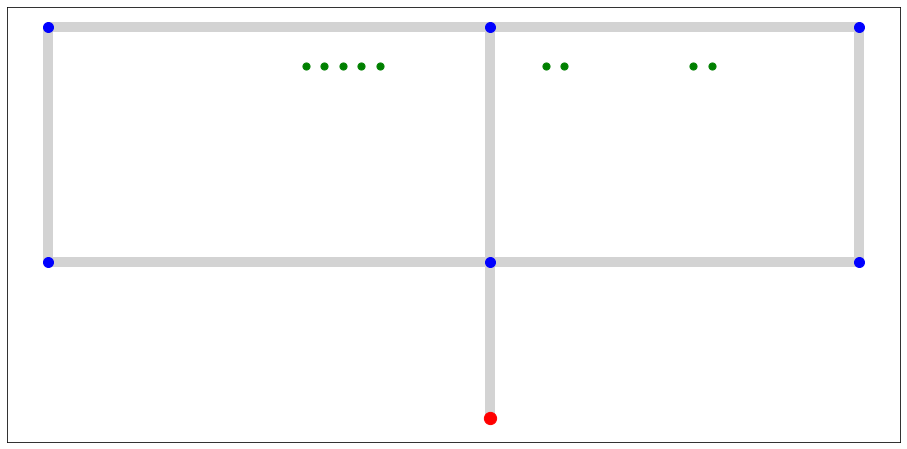

In [10]:
nx.draw_networkx_nodes(grid_data.network_graph, 
                       pos=grid_data.nodes_pos, 
                       nodelist=grid_data.node_list, node_color='b', node_size=100)
nx.draw_networkx_nodes(grid_data.network_graph, 
                       pos=grid_data.nodes_pos, 
                       nodelist=grid_data.node_list_msr, node_color='r', node_size=150)
nx.draw_networkx_nodes(grid_data.network_graph, 
                       pos=grid_data.household_nodes_pos, 
                       nodelist=grid_data.node_list_households, node_color='g', node_size=50)
nx.draw_networkx_edges(grid_data.network_graph, 
                       pos=grid_data.nodes_pos,
                       edgelist=grid_data.edge_tuples, edge_color='lightgrey', width=10)

### Possible solutions

In the real world a net station has a number of free cables which may differ per type of station. This can be 8 for instance, but also 4, 5 or sometimes even 12.
In this small neighbourhood example the engineer can only use 2 cables to connect all the 9 houses. He may also use 1 cable if he thinks that's the best option. Some possible solutions are:

- Use two cables: one from the MSR to the 5 houses on the left and one from the MSR to the 4 houses on the right.
- Use one cable straight ahead and split with an "aftakmof" to the left and right.
- Use one cable without a "aftakmof" but go immediately to the left and follow the road. Here at least three "verbindingsmoffen" are needed.